In [1]:
# Load a local copy of the current ODYM branch:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#from seaborn.palettes import color_palette
import xlrd
import pylab
from copy import deepcopy
import logging as log
from xlrd.biffh import BIFF_FIRST_UNICODE
import xlwt
from scipy.stats import norm
from cycler import cycler
#import seaborn as sns
import dynamic_stock_model as dsm
import product_component_model as pcm

In [2]:
# Loading data
path = os.getcwd()
data = pd.read_csv(path+"/old_model/dummy_data_battery.csv", header=0 , sep=',')
# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We store the time and inflows values in two lists
time = data['Time'].to_numpy()
stock_cars = data['Population'].to_numpy() # FIXME: Is he stock just labeled wrongly as population or is it intended this way?
years = len(time)

\\home.ansatt.ntnu.no\romainb\Documents\6. Papers\7. Battery replacement modeling paper\Battery_replacements\product_component_model.py:710: RuntimeWarning: invalid value encountered in true_divide
  self.oc_cm[m, 0:m] = self.sc_cm[m-1, 0:m]/self.sf_cm[m-1,0:m] * abs((self.sf_cm[m, 0:m] - self.sf_cm[m-1, 0:m]))# FIXME: Truedev gives a warning for some values, TODO: Double-check if use of sc_cm is correct here rather than sc_pr
\\home.ansatt.ntnu.no\romainb\Documents\6. Papers\7. Battery replacement modeling paper\Battery_replacements\product_component_model.py:797: RuntimeWarning: overflow encountered in double_scalars
  self.oc_cm[m, c] = (self.sc_cm[m-1, c]- self.oc_pr[m, c])/self.sf_cm[m-1,c] * abs((self.sf_cm[m, c] - self.sf_cm[m-1, c]))# Calculating outflows attributed to component failures
\\home.ansatt.ntnu.no\romainb\Documents\6. Papers\7. Battery replacement modeling paper\Battery_replacements\product_component_model.py:801: RuntimeWarning: invalid value encountered in double_

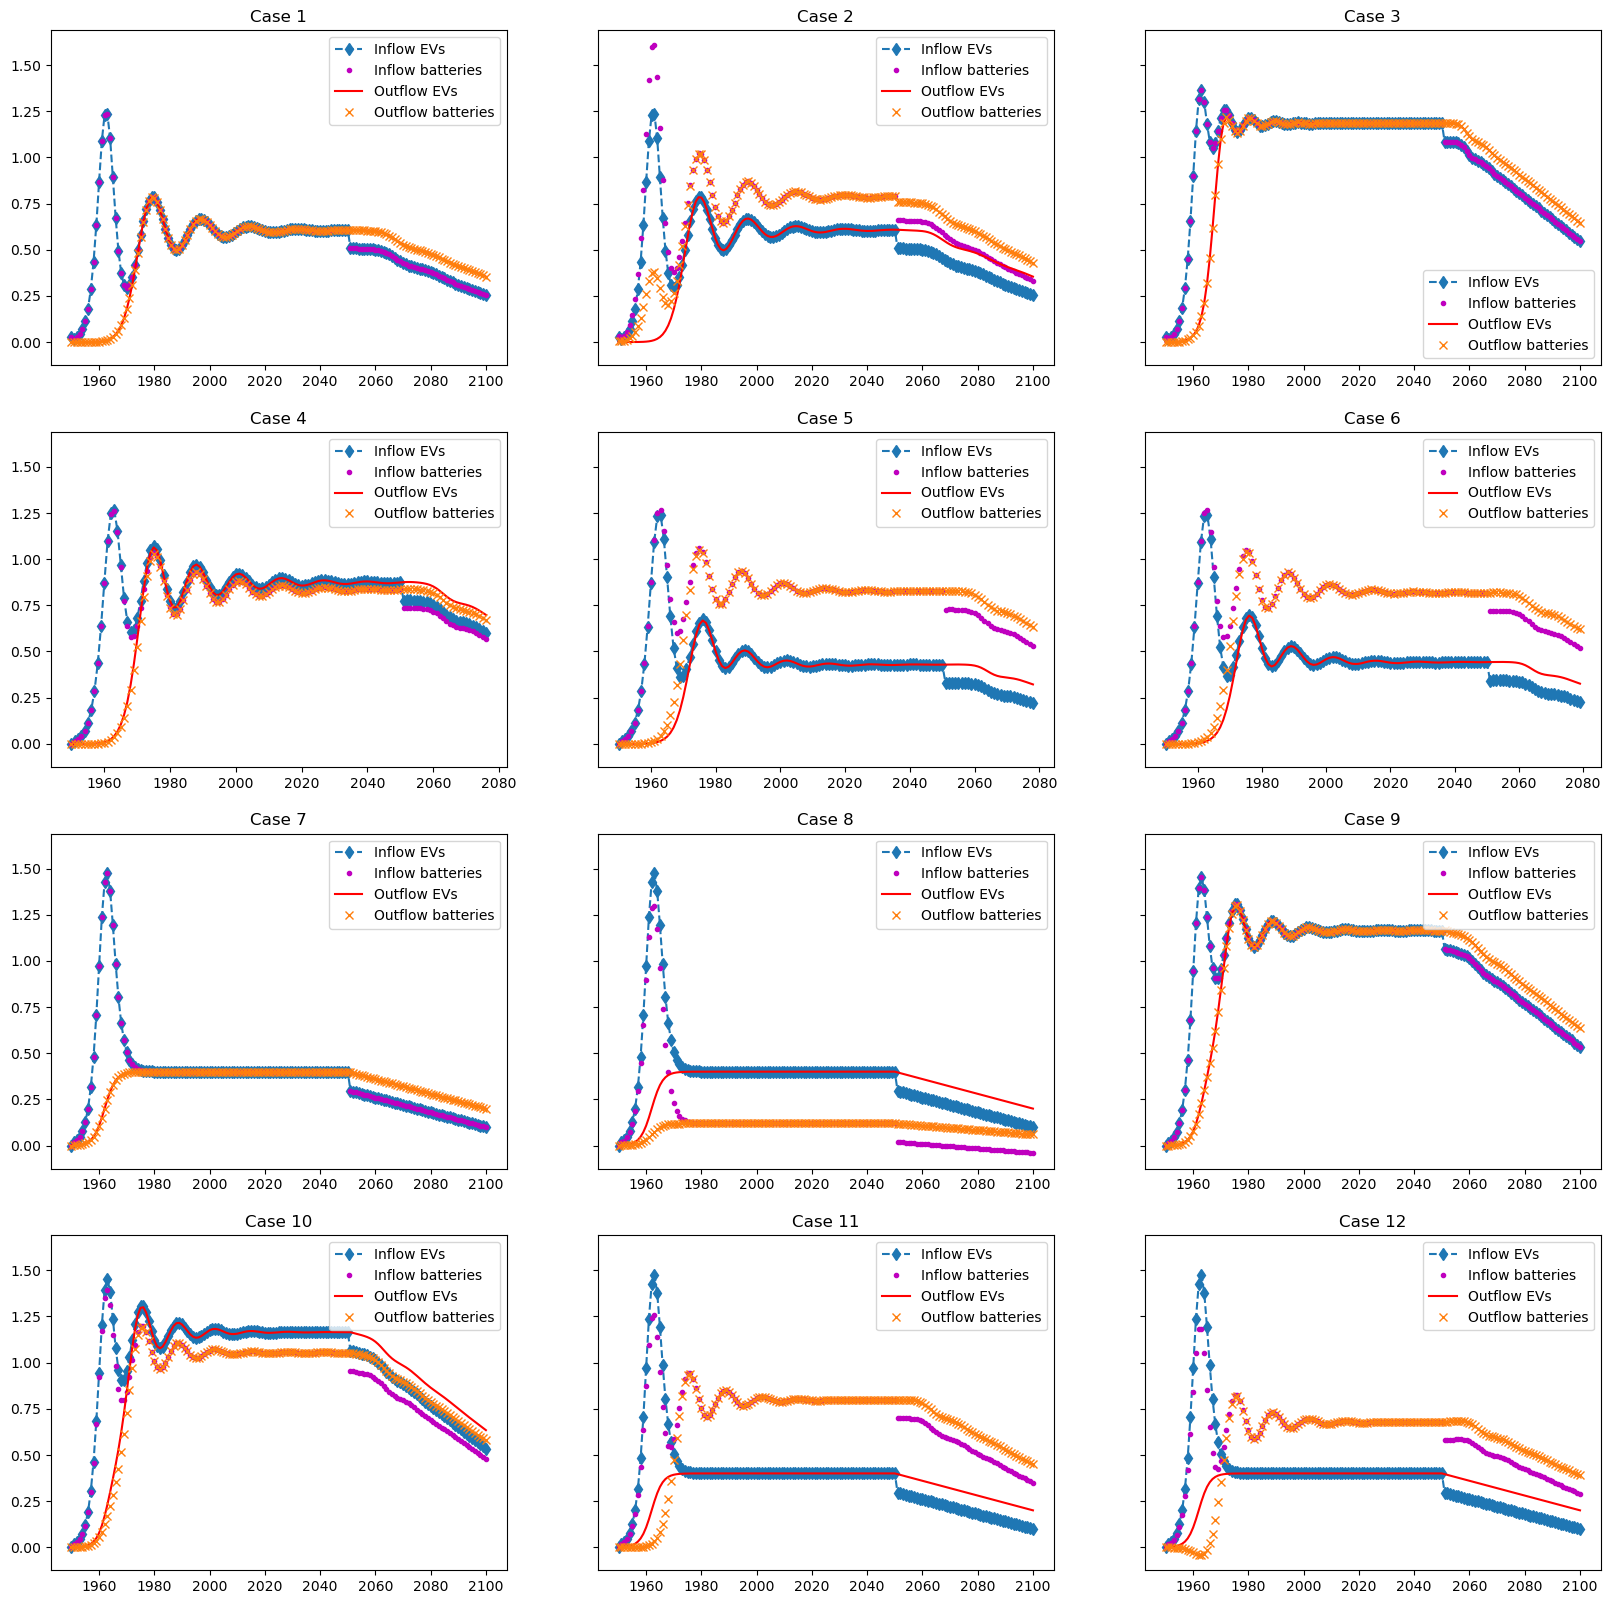

In [3]:
fig, axs = plt.subplots(4, 3, figsize=(20,20), sharey=True)
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, 
                                  lt_cm={'Type': 'Normal', 'Mean':np.array([8]), 'StdDev': np.array([2])}, 
                                  lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])},
                                  d=0.04, r=0.3, tau_cm=3, tau_pr=3)
# Case 1
Model.case_1()
axs[0, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 0].set_title('Case 1')
axs[0, 0].legend(loc='best')

# Case 2
Model.case_2()

axs[0, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[0, 1].set_title('Case 2')
axs[0, 1].legend(loc='best')

# Case 3
Model.case_3()

axs[0, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[0, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[0, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[0, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[0, 2].set_title('Case 3')
axs[0, 2].legend(loc='best')

# Case 4
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_4()
axs[1, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 0].set_title('Case 4')
axs[1, 0].legend(loc='best')

# Case 5
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_5()
axs[1, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 1].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 1].set_title('Case 5')
axs[1, 1].legend(loc='best')


# Case 6
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_6()

axs[1, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[1, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[1, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[1, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[1, 2].set_title('Case 6')
axs[1, 2].legend(loc='best')


# Case 7a
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_7()

axs[2, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 0].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 0].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 0].set_title('Case 7')
axs[2, 0].legend(loc='best')


# Case 8a
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_8()

axs[2, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[2, 1].plot(time, Model.o_cm,'x', label='Outflow batteries')
axs[2, 1].set_title('Case 8')
axs[2, 1].legend(loc='best')

# Case 9
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_9()

axs[2, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[2, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[2, 2].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[2, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[2, 2].set_title('Case 9')
axs[2, 2].legend(loc='best')


# Case 10
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_10()

axs[3, 0].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 0].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 0].plot(time, Model.oc_pr.sum(axis=1),'r', label='Outflow EVs')
axs[3, 0].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 0].set_title('Case 10')
axs[3, 0].legend(loc='best')


# Case 11
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_11()

axs[3, 1].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 1].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 1].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 1].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 1].set_title('Case 11')
axs[3, 1].legend(loc='best')


# Case 12
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([3])}, lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, d=0.04, r=0.3, tau_cm=3, tau_pr=3)

Model.case_12()

axs[3, 2].plot(time, Model.i_pr, 'd--', label='Inflow EVs')
axs[3, 2].plot(time, Model.i_cm, 'm.', label='Inflow batteries')
axs[3, 2].plot(time, Model.o_pr,'r', label='Outflow EVs')
axs[3, 2].plot(time, Model.oc_cm.sum(axis=1),'x', label='Outflow batteries')
axs[3, 2].set_title('Case 12')
axs[3, 2].legend(loc='best')

plt.show()

In [4]:
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, 
                                  lt_cm={'Type': 'Normal', 'Mean':np.array([8]), 'StdDev': np.array([2])}, 
                                  lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, 
                                  d=0.04, r=0.3, tau_cm=3, tau_pr=3)
Model.case_3()


(array([[0.02472623, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02471986, 0.01598202, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02468867, 0.0159779 , 0.02626276, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.56950538, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.56935862, 0.5577327 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.56864032, 0.55758897,
         0.54595324]]),
 array([0.02472702, 0.01598202, 0.02626276, 0.04309698, 0.07054835,
        0.11487261, 0.18499455, 0.29211966, 0.44727025, 0.65482676,
        0.90094185, 1.14247388, 1.31381381, 1.36422922, 1.29994942,
        1.18288765, 1.0855242 , 1.04990886, 1.0782073 , 1.14483679,
        1.21420178, 1.25667339, 1.2594117 , 1.22903556, 1.18548016,
        1.15067538, 1.13825196, 1.14909998, 1.17366197, 1.19837068,
 

In [5]:
Model.check_stock_balance_pr()

array([ 0.00000000e+00,  5.06170520e-07,  3.25603785e-07,  5.33160646e-07,
        8.69418902e-07,  1.40380429e-06,  2.22084904e-06,  3.39278534e-06,
        4.91381164e-06,  6.57357249e-06,  7.79477057e-06,  7.64961919e-06,
        5.42654856e-06,  1.59671843e-06, -2.03582081e-06, -3.70749190e-06,
       -3.08362135e-06, -1.12798197e-06,  8.96246836e-07,  2.11023858e-06,
        2.19687553e-06,  1.34512855e-06,  8.67255496e-08, -9.62050095e-07,
       -1.37945342e-06, -1.10231077e-06, -3.93465094e-07,  3.43570400e-07,
        7.77908594e-07,  7.82555688e-07,  4.44809936e-07, -1.77870547e-08,
       -3.78302549e-07, -5.00198438e-07, -3.78508579e-07, -1.15841730e-07,
        1.44105569e-07,  2.87983279e-07,  2.76442445e-07,  1.46275423e-07,
       -2.13252229e-08, -1.45399939e-07, -1.80562265e-07, -1.29563378e-07,
       -3.22744385e-08,  5.93063469e-08,  1.06282663e-07,  9.71395360e-08,
        4.73916832e-08, -1.29662816e-08, -5.53429733e-08, -6.48629856e-08,
       -4.40607910e-08, -

In [6]:
Model.check_stock_balance_cm()

array([ 7.83135276e-07,  5.06170520e-07,  3.25603785e-07,  5.33160646e-07,
        8.69418902e-07,  1.40380429e-06,  2.22084904e-06,  3.39278534e-06,
        4.91381164e-06,  6.57357249e-06,  7.79477057e-06,  7.64961919e-06,
        5.42654856e-06,  1.59671843e-06, -2.03582081e-06, -3.70749190e-06,
       -3.08362135e-06, -1.12798197e-06,  8.96246836e-07,  2.11023858e-06,
        2.19687553e-06,  1.34512855e-06,  8.67255496e-08, -9.62050095e-07,
       -1.37945342e-06, -1.10231077e-06, -3.93465094e-07,  3.43570400e-07,
        7.77908594e-07,  7.82555688e-07,  4.44809936e-07, -1.77870547e-08,
       -3.78302549e-07, -5.00198438e-07, -3.78508579e-07, -1.15841730e-07,
        1.44105569e-07,  2.87983279e-07,  2.76442445e-07,  1.46275423e-07,
       -2.13252229e-08, -1.45399939e-07, -1.80562265e-07, -1.29563378e-07,
       -3.22744385e-08,  5.93063469e-08,  1.06282663e-07,  9.71395360e-08,
        4.73916832e-08, -1.29662816e-08, -5.53429733e-08, -6.48629856e-08,
       -4.40607910e-08, -

In [7]:
Model.check_stock_pr_cm()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
Model.o_cm / Model.o_pr 

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
Model.s_pr[10]/Model.s_pr[9]-1

0.4742532503009316

In [10]:
Model.s_pr

array([ 0.02472623,  0.04070138,  0.06692851,  0.10986943,  0.1798621 ,
        0.29312231,  0.47425873,  0.7585818 ,  1.19202922,  1.82425524,
        2.68941421,  3.77540669,  5.        ,  6.22459331,  7.31058579,
        8.17574476,  8.80797078,  9.2414182 ,  9.52574127,  9.70687769,
        9.8201379 ,  9.89013057,  9.93307149,  9.95929862,  9.97527377,
        9.98498818,  9.99088949,  9.99447221,  9.9966465 ,  9.99796573,
        9.99876605,  9.99925154,  9.99954602,  9.99972464,  9.99983299,
        9.9998987 ,  9.99993856,  9.99996273,  9.9999774 ,  9.99998629,
        9.99999168,  9.99999496,  9.99999694,  9.99999814,  9.99999887,
        9.99999932, 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.  

In [11]:
o3 = Model.o_pr

In [12]:
Model.case_1()
o1 = Model.o_pr

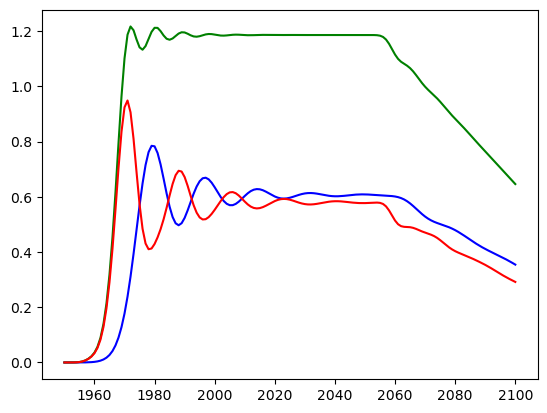

In [13]:
fig, ax = plt.subplots()
ax.plot(time,o1,'b')
ax.plot(time,o3,'g')
ax.plot(time,o3-o1,'r')
plt.show()

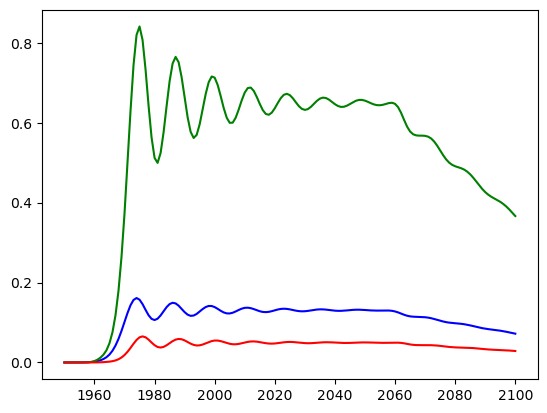

In [14]:
Model = pcm.ProductComponentModel(t=time, s_pr=stock_cars, 
                                  lt_cm={'Type': 'Normal', 'Mean':np.array([12]), 'StdDev': np.array([2])}, 
                                  lt_pr={'Type': 'Normal', 'Mean':np.array([16]), 'StdDev': np.array([4])}, 
                                  d=0.04, r=0.3, tau_cm=3, tau_pr=3)
Model.case_3()
fig, ax = plt.subplots()
ax.plot(time,Model.oc_due_to_pr.sum(axis=1),'b')
ax.plot(time,Model.oc_due_to_cm.sum(axis=1),'g')
ax.plot(time,Model.oc_both.sum(axis=1),'r')
plt.show()